In [932]:
# Import all the libraries we are likely to need to modeling/exploration.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [933]:
from pandas.plotting import scatter_matrix

In [934]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

In [935]:
# Formulas
def calc_slope(xs,ys):
    return (np.mean(xs) * np.mean(ys) - np.mean(xs*ys)) / (np.mean(xs)**2 - np.mean(xs**2))

def best_fit(xs,ys):
    slope = calc_slope(xs,ys)
    intercept = np.mean(ys) - slope*np.mean(xs)
    return (slope, intercept)

def reg_line (m, c, xs):
    y = []
    for x in xs:
         y.append(m*x+c)
        
    return y

# Data Exploration and Cleaning

In [1128]:
# Import the data itself. Display the info. 
king_county_source = pd.read_csv('kc_house_data.csv')
king_county_source.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1129]:
king_county_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [1130]:
king_county_source.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Quick observations:
    1. We are missing observations for waterfront, view and yr_renovated. 
    2. sqft_basement is an object. Would expect int or float. Other sqft values are ints.
    3. Date is also an object. 
    4. yr_renovated is a float. Would expect int.
    5. floors is also a float. From my research however, this simply because houses with attics are classified as            #.5. 

In [1131]:
# Check for null values. 
king_county_source.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1132]:
# Checking for unique values
print(king_county_source['view'].unique())
print(king_county_source['waterfront'].unique())
print(king_county_source['yr_renovated'].unique())

[ 0. nan  3.  4.  2.  1.]
[nan  0.  1.]
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


More observations: 
    1. Waterfront appears to be a binary (on the waterfront or not). Has NaN values to remove.
    2. The majority of houses have not been renovated. Has NaN values to remove as well. 

In [1133]:
# Removing NaN values.
king_county_source['yr_renovated'].fillna(0, inplace=True)

In [1134]:
king_county_source['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [1135]:
# Updating this to binary has or has not been renovated. 
king_county_source['yr_renovated'].apply(lambda yr: 1 if yr > 0 else 0).value_counts()

0    20853
1      744
Name: yr_renovated, dtype: int64

In general, houses seem to need some sort of renovation every 30 years, however all the individual components can last much longer if properly cared for and if high quality materials/work. Since we don't have that data, simply changing to a binary - has been renovated or no. 

In [1136]:
king_county_source['waterfront'].fillna(0, inplace=True)
king_county_source['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [1137]:
# Changing sqft_basement to ints.
king_county_source['sqft_basement'] = pd.to_numeric(king_county_source['sqft_basement'], errors='coerce')

In [1138]:
king_county_source['sqft_basement'].isna().sum()

454

In [1139]:
# Changing new NaN values into ints by subtracting sqft_living from sqft_above. 
king_county_source['sqft_basement'].fillna(king_county_source['sqft_living']-king_county_source['sqft_above'], inplace=True) 
king_county_source['sqft_basement'].isna().sum()

0

In [1140]:
king_county_source['view'].fillna(0, inplace=True)

In [1141]:
king_county_source['view'].unique()

array([0., 3., 4., 2., 1.])

In [1142]:
king_county_source = king_county_source.drop(['id'], axis=1)

In [1143]:
# Changing date into datetime.
king_county_source['date'] = pd.to_datetime(king_county_source['date'], yearfirst=True)
king_county_source['date'].describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [1144]:
# Binning date into seasons. 
bins = pd.date_range(start='2014-04-30', periods = 5, freq='4M', )
bins_date = pd.cut(king_county_source['date'], bins)

In [1145]:
date_dummy = pd.get_dummies(bins_date, prefix="DATE")

In [1146]:
king_county_mezz = king_county_source.drop("date", axis=1) 

In [1147]:
king_county_mezz = pd.concat([king_county_mezz, date_dummy], axis=1)
king_county_mezz.rename(columns={'DATE_(2014-04-30, 2014-08-31]':'Summer_2014', 'DATE_(2014-08-31, 2014-12-31]':'Winter_2014', 'DATE_(2014-12-31, 2015-04-30]':'Winter_2015','DATE_(2015-04-30, 2015-08-31]':'Summer_2015' }, inplace=True)
king_county_mezz.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Summer_2014,Winter_2014,Winter_2015,Summer_2015
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0


# Plotting Check

In [1148]:
def kde_hist(dataframe):
    for column in dataframe:
        dataframe[column].plot.hist(normed=True, label = column+' histogram')
        dataframe[column].plot.kde(label =column+' kde')
        plt.legend()
        plt.show()

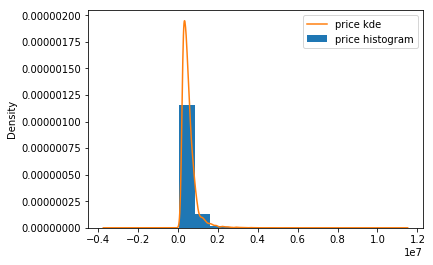

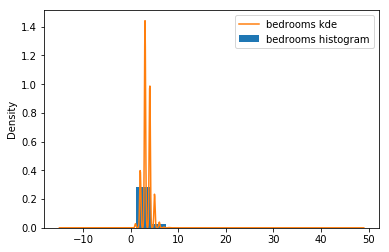

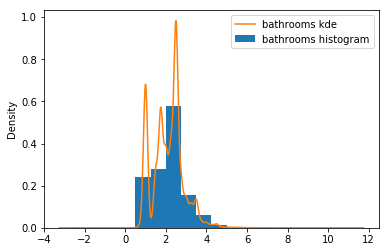

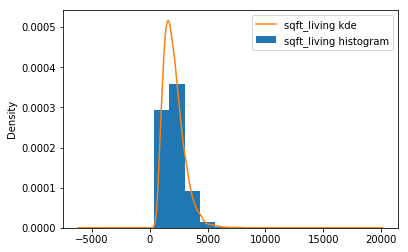

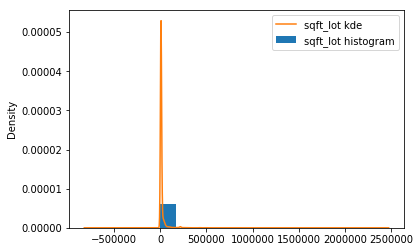

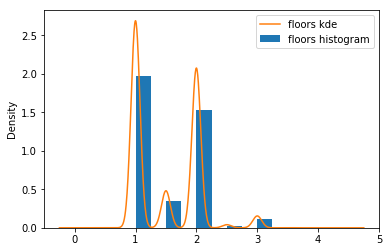

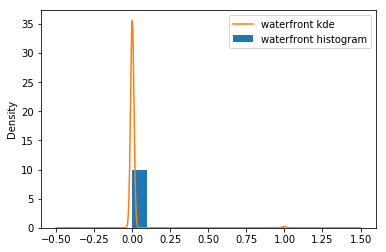

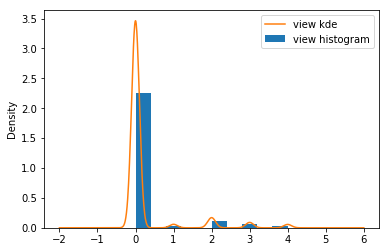

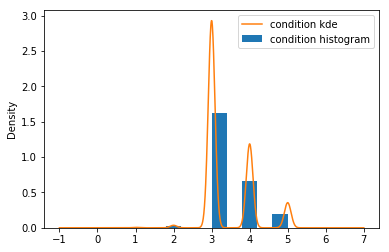

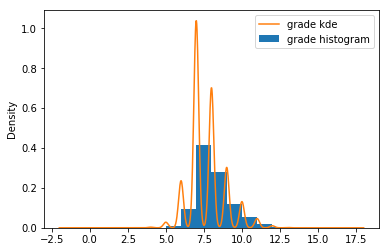

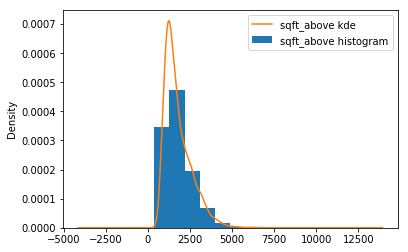

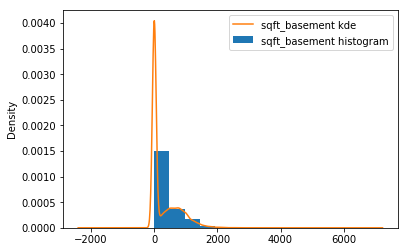

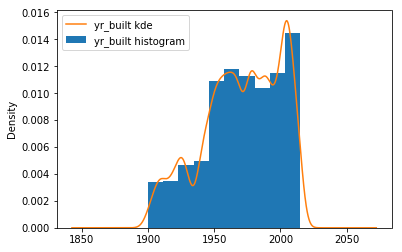

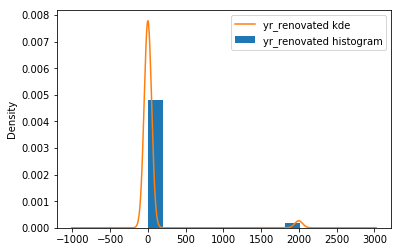

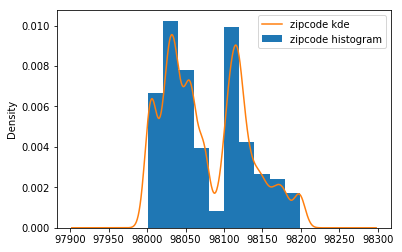

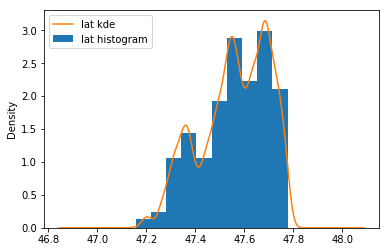

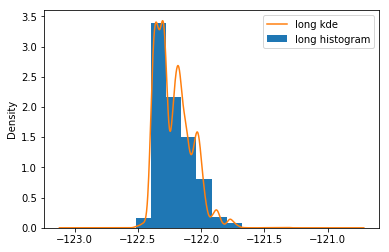

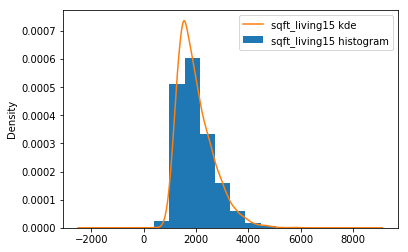

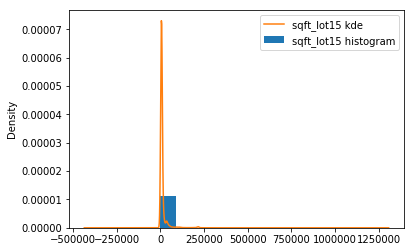

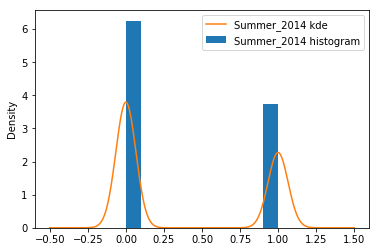

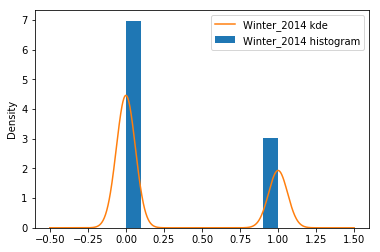

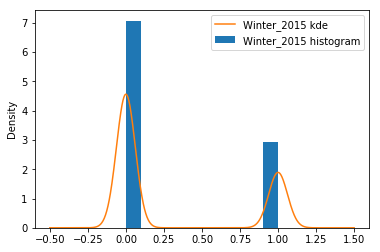

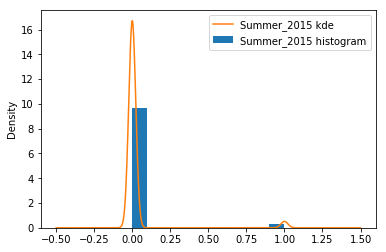

In [957]:
# KDE and historgram plots. 
kde_hist(king_county_mezz)

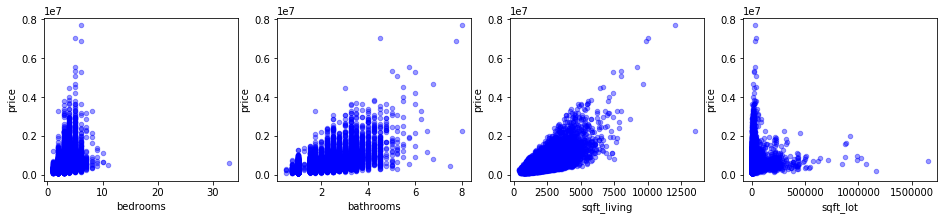

In [1149]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    king_county_mezz.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

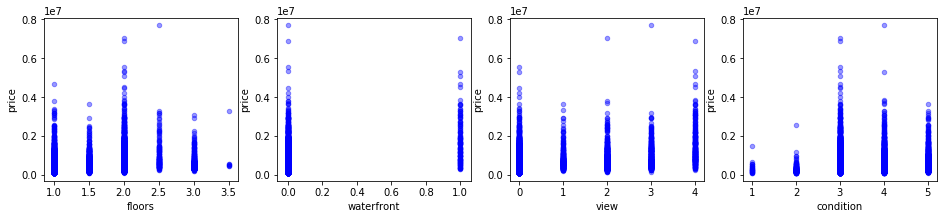

In [1150]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['floors', 'waterfront', 'view', 'condition'], axes):
    king_county_mezz.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

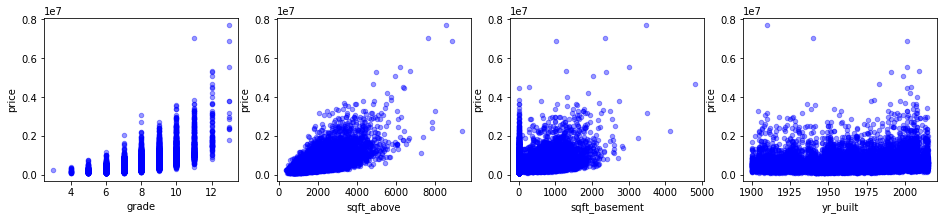

In [1151]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_above','sqft_basement', 'yr_built'], axes):
    king_county_mezz.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

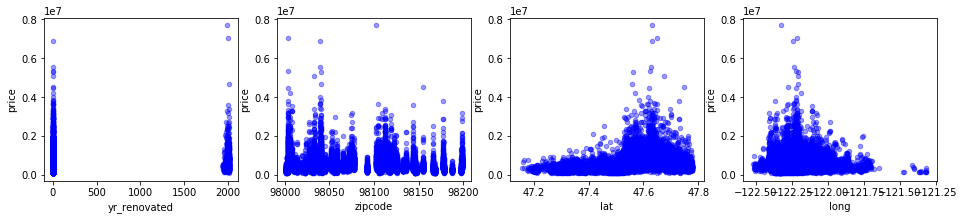

In [1152]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_renovated', 'zipcode', 'lat', 'long'], axes):
    king_county_mezz.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

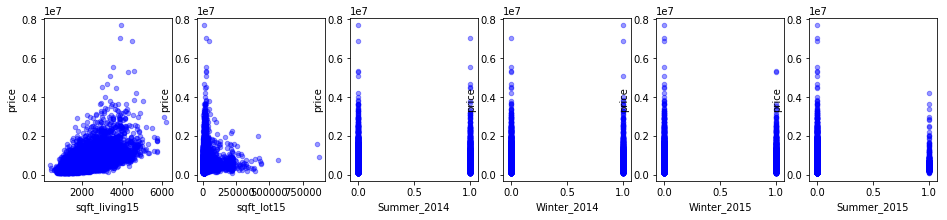

In [1153]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))

for xcol, ax in zip(['sqft_living15', 'sqft_lot15', 'Summer_2014', 'Winter_2014',
       'Winter_2015', 'Summer_2015'], axes):
    king_county_mezz.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

More more observations:
    1. Square footage, bedrooms and bathrooms skewed by outliers.
    2. sqft_living, bathroom and even grade seem to be linear. 
    3. Floors, view, condition and zipcode appear to be categorical. 

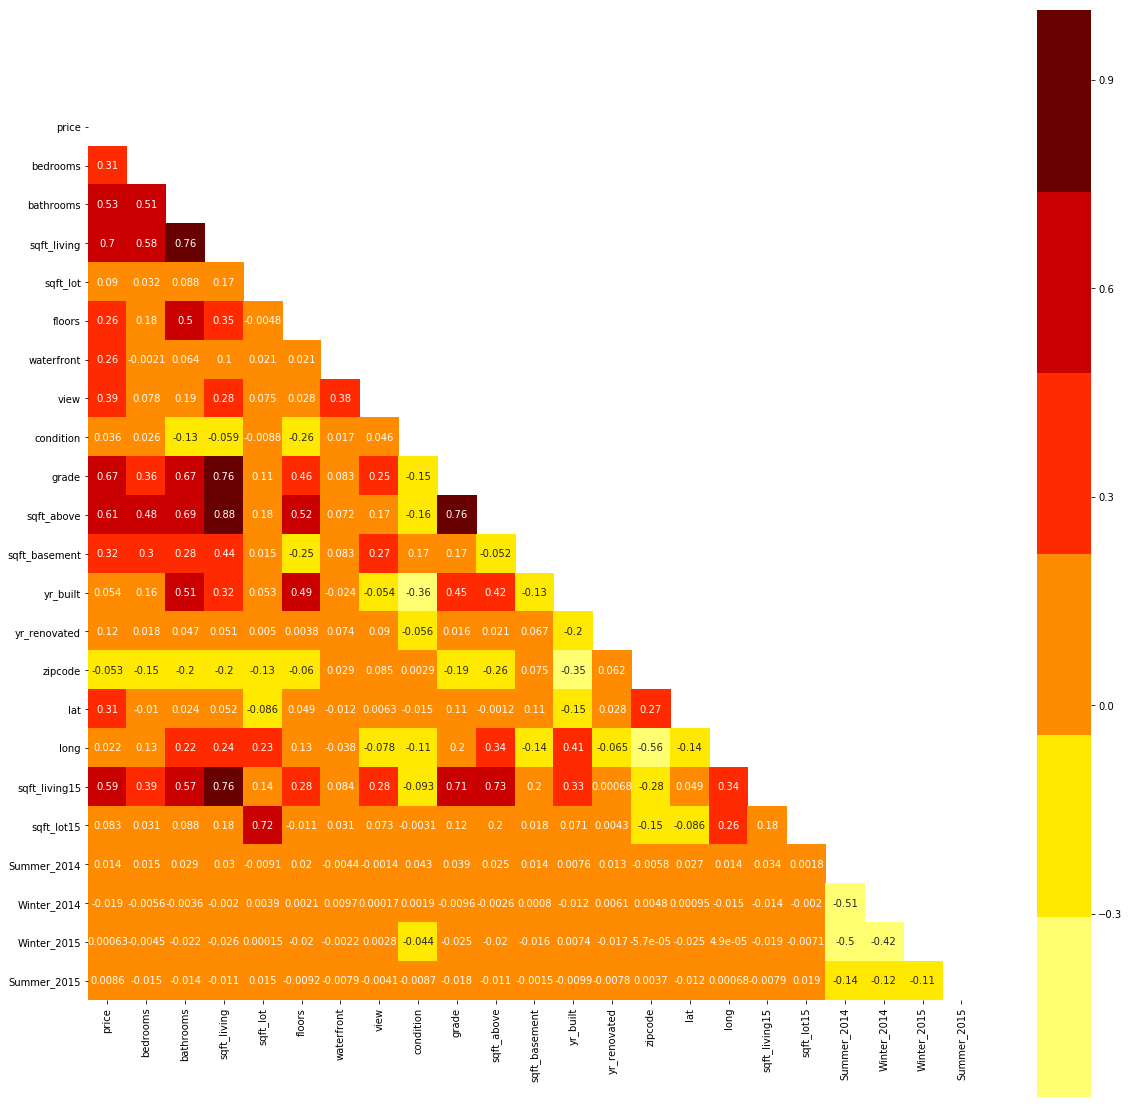

In [1154]:
# Checking correlation
fig, ax = plt.subplots(figsize=(20,20)) 
mask=np.zeros_like(king_county_mezz.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
color_map = sns.color_palette("hot_r")
ax = sns.heatmap(king_county_mezz.corr(), cmap = color_map, mask=mask, square=True, annot=True)

Highest correlations with price are sqft_living, bathrooms, grade, sqft_above, sqft_living15. Most of those have a high correlation with each other.

In [1155]:
# Attempting to remove some outliers.
king_county_mezz = king_county_mezz[king_county_mezz['sqft_living'] < king_county_mezz['sqft_living'].quantile(.999)]
king_county_mezz = king_county_mezz[king_county_mezz['bedrooms'] < king_county_mezz['bedrooms'].quantile(.999)]
king_county_mezz = king_county_mezz[king_county_mezz['bathrooms'] < king_county_mezz['bathrooms'].quantile(.999)]

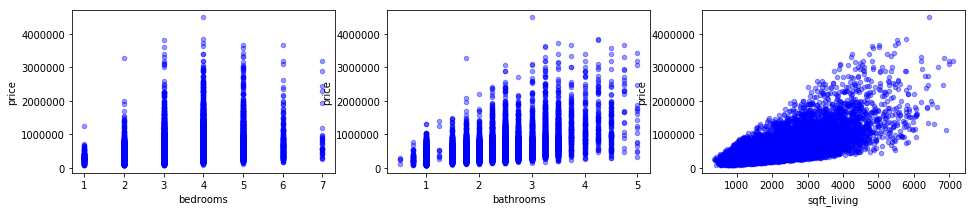

In [1156]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living'], axes):
    king_county_mezz.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

# Binning/More Dummies

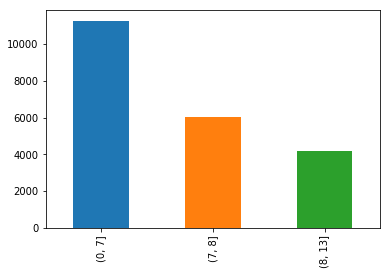

In [1157]:
# Binning grade
bins = [0, 7, 8, 13]
bins_grade = pd.cut(king_county_mezz['grade'], bins)
bins_grade = bins_grade.cat.as_unordered()
bins_grade.value_counts().plot(kind='bar')

In [1158]:
king_county_mezz['grade']=bins_grade

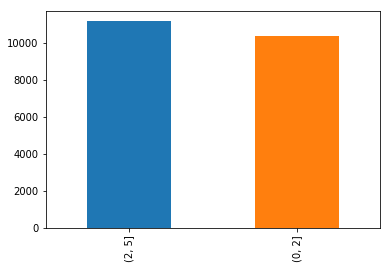

In [1159]:
bins = [0, 2, 5]
bins_bathrooms = pd.cut(king_county_mezz['bathrooms'], bins)
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bins_bathrooms.value_counts().plot(kind='bar')

In [1160]:
king_county_mezz['bathrooms']=bins_bathrooms

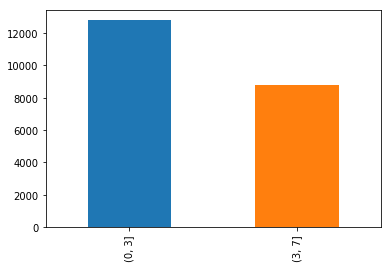

In [1161]:
bins = [0, 3, 7]
bins_bedrooms = pd.cut(king_county_mezz['bedrooms'], bins)
bins_bedrooms = bins_bedroooms.cat.as_unordered()
bins_bedrooms.value_counts().plot(kind='bar')

In [1162]:
king_county_mezz['bedrooms']=bins_bedrooms

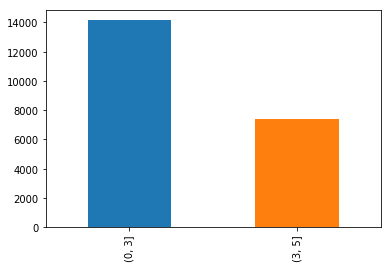

In [1163]:
bins = [0, 3, 5]
bins_condition = pd.cut(king_county_mezz['condition'], bins)
bins_condition = bins_condition.cat.as_unordered()
bins_condition.value_counts().plot(kind='bar')

In [1164]:
king_county_mezz['condition']=bins_condition

In [1165]:
zip_dummies = pd.get_dummies(king_county_mezz['zipcode'], prefix="zip", drop_first=True)

In [1166]:
zip_dummies.head()

,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1167]:
king_county_mezz = king_county_mezz.drop('zipcode', axis=1)

In [1168]:
king_county_mezz = pd.concat([king_county_mezz, zip_dummies], axis=1)
king_county_mezz.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Summer_2014,Winter_2014,Winter_2015,Summer_2015,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,"(0, 3]","(0, 2]",1180,5650,1.0,0.0,0.0,"(0, 3]","(0, 7]",1180,0.0,1955,0.0,47.5112,-122.257,1340,5650,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,"(0, 3]","(2, 5]",2570,7242,2.0,0.0,0.0,"(0, 3]","(0, 7]",2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,"(0, 3]","(0, 2]",770,10000,1.0,0.0,0.0,"(0, 3]","(0, 7]",770,0.0,1933,0.0,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,"(3, 7]","(2, 5]",1960,5000,1.0,0.0,0.0,"(3, 5]","(0, 7]",1050,910.0,1965,0.0,47.5208,-122.393,1360,5000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,"(0, 3]","(0, 2]",1680,8080,1.0,0.0,0.0,"(0, 3]","(7, 8]",1680,0.0,1987,0.0,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1169]:
# Log transformation to correct skew
king_county_mezz['price_log'] = np.log(king_county_mezz['price'])

In [1170]:
king_county_mezz['sqft_living'] = king_county_mezz['sqft_living'].apply(np.log)

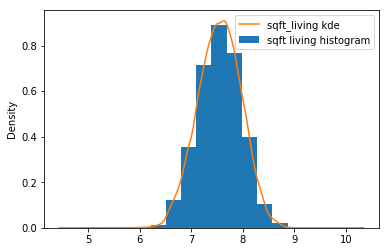

In [1171]:
king_county_mezz['sqft_living'].plot.hist(normed=True, label = 'sqft living histogram')
king_county_mezz['sqft_living'].plot.kde(label ='sqft_living'+' kde')
plt.legend()
plt.show()

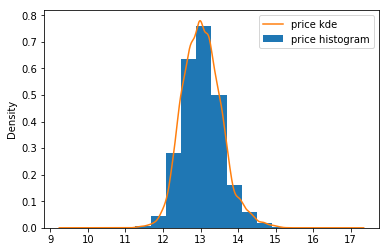

In [1172]:
king_county_mezz['price_log'].plot.hist(normed=True, label = 'price'+' histogram')
king_county_mezz['price_log'].plot.kde(label ='price'+' kde')
plt.legend()
plt.show()

# Creating Testing Data

In [1173]:
train_amt = int(0.80*len(king_county_mezz))
train_df = king_county_mezz.sample(train_amt)

In [1174]:
test_amt = len(king_county_mezz) - train_amt
test_df = king_county_mezz.sample(test_amt)

# Oh hell, let's test things

## SQFT_Living only

In [1175]:
f = 'price_log~sqft_living'
sqft_living_model = smf.ols(formula=f, data=train_df).fit()

In [1176]:
sqft_living_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                 1.371e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:57:49   Log-Likelihood:                -8094.9
No. Observations:               17220   AIC:                         1.619e+04
Df Residuals:                   17218   BIC:                         1.621e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8045      0.053    127.495      0.000       6.700       6.909
sqft_living     0.8266      0.007    117.092      0.000       0.813       0.840
==============================================================================
Omnibus:                       96.966   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.994
Skew:                           0.131   Prob(JB):                     1.29e-19
Kurtosis:                       2.771   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

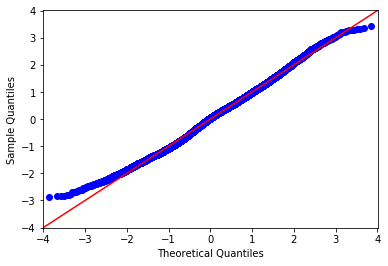

In [1177]:
residuals = sqft_living_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Grade only

In [1178]:
f = 'price_log~grade'
grade_model = smf.ols(formula=f, data=train_df).fit()

In [1179]:
grade_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     6057.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:57:58   Log-Likelihood:                -8551.3
No. Observations:               17220   AIC:                         1.711e+04
Df Residuals:                   17217   BIC:                         1.713e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   12.7716      0.004   3047.534      0.000      12.763      12.780
grade[T.Interval(7, 8, closed='right')]      0.3633      0.007     51.302      0.000       0.349       0.377
grade[T.Interval(8, 13, closed='right')]     0.8711      0.008    108.453      0.000       0.855       0.887
==============================================================================
Omnibus:                       78.846   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.611
Skew:                           0.128   Prob(JB):                     1.56e-19
Kurtosis:                       3.235   Cond. No.                         3.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

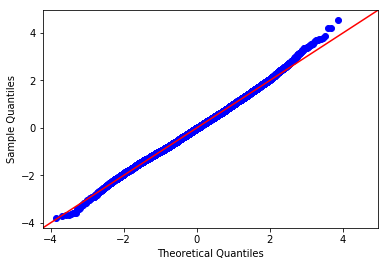

In [1180]:
residuals = grade_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Bathrooms only

In [1181]:
f = 'price_log~bathrooms'
bathrooms_model = smf.ols(formula=f, data=train_df).fit()

In [1182]:
bathrooms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3526.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:58:03   Log-Likelihood:                -11534.
No. Observations:               17220   AIC:                         2.307e+04
Df Residuals:                   17218   BIC:                         2.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      12.8213      0.005   2463.415      0.000      12.811      12.831
bathrooms[T.Interval(2, 5, closed='right')]     0.4283      0.007     59.384      0.000       0.414       0.442
==============================================================================
Omnibus:                      328.345   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.780
Skew:                           0.330   Prob(JB):                     6.75e-77
Kurtosis:                       3.231   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

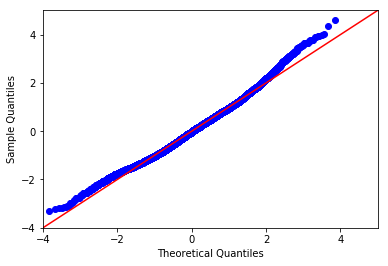

In [1183]:
residuals = bathrooms_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Lat only

In [1184]:
f = 'price_log~lat'
lat_model = smf.ols(formula=f, data=train_df).fit()

In [1185]:
lat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     4481.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:58:12   Log-Likelihood:                -11146.
No. Observations:               17220   AIC:                         2.230e+04
Df Residuals:                   17218   BIC:                         2.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.7300      1.207    -56.131      0.000     -70.095     -65.365
lat            1.6984      0.025     66.941      0.000       1.649       1.748
==============================================================================
Omnibus:                     1046.231   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1513.513
Skew:                           0.531   Prob(JB):                         0.00
Kurtosis:                       3.991   Cond. No.                     1.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

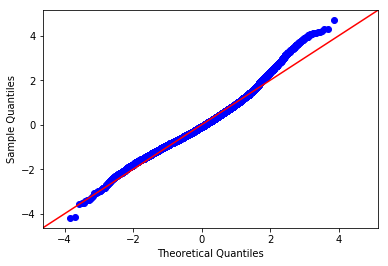

In [1186]:
residuals = lat_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## All four

In [1187]:
f = 'price_log~sqft_living+bathrooms+lat+grade'
happy_family_model = smf.ols(formula=f, data=train_df).fit()

In [1188]:
happy_family_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     7334.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:58:19   Log-Likelihood:                -3312.8
No. Observations:               17220   AIC:                             6638.
Df Residuals:                   17214   BIC:                             6684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -63.6669      0.774    -82.246      0.000     -65.184     -62.150
bathrooms[T.Interval(2, 5, closed='right')]    -0.0553      0.006     -9.160      0.000      -0.067      -0.043
grade[T.Interval(7, 8, closed='right')]         0.1634      0.006     27.043      0.000       0.152       0.175
grade[T.Interval(8, 13, closed='right')]        0.4323      0.008     53.042      0.000       0.416       0.448
sqft_living                                     0.5867      0.008     73.972      0.000       0.571       0.602
lat                                             1.5177      0.016     93.519      0.000       1.486       1.550
==============================================================================
Omnibus:                      506.028   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.286
Skew:                           0.320   Prob(JB):                    9.56e-155
Kurtosis:                       3.760   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

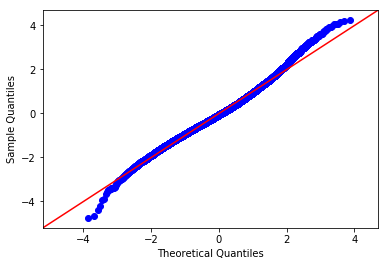

In [1189]:
residuals = happy_family_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Plus seasons

In [1190]:
f = 'price_log~sqft_living+bathrooms+lat+grade+Summer_2014+Winter_2014+Winter_2015+Summer_2015'
happy_family_seasons_model = smf.ols(formula=f, data=train_df).fit()

In [1191]:
happy_family_seasons_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     4624.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:58:25   Log-Likelihood:                -3260.3
No. Observations:               17220   AIC:                             6539.
Df Residuals:                   17211   BIC:                             6608.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -51.0736      0.618    -82.681      0.000     -52.284     -49.863
bathrooms[T.Interval(2, 5, closed='right')]    -0.0548      0.006     -9.105      0.000      -0.067      -0.043
grade[T.Interval(7, 8, closed='right')]         0.1636      0.006     27.146      0.000       0.152       0.175
grade[T.Interval(8, 13, closed='right')]        0.4330      0.008     53.275      0.000       0.417       0.449
sqft_living                                     0.5877      0.008     74.306      0.000       0.572       0.603
lat                                             1.5216      0.016     93.994      0.000       1.490       1.553
Summer_2014                                   -12.7986      0.155    -82.782      0.000     -13.102     -12.496
Winter_2014                                   -12.8033      0.155    -82.860      0.000     -13.106     -12.500
Winter_2015                                   -12.7593      0.154    -82.603      0.000     -13.062     -12.457
Summer_2015                                   -12.7124      0.155    -82.209      0.000     -13.015     -12.409
==============================================================================
Omnibus:                      496.719   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.181
Skew:                           0.314   Prob(JB):                    5.50e-153
Kurtosis:                       3.764   Cond. No.                     1.68e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

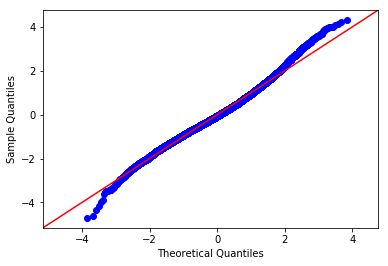

In [1192]:
residuals = happy_family_seasons_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Adding more

In [1193]:
f = 'price_log~sqft_living+bathrooms+lat+grade+view+waterfront'
happy_family_view_waterfront_model = smf.ols(formula=f, data=train_df).fit()

In [1194]:
happy_family_view_waterfront_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     6051.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:58:32   Log-Likelihood:                -2448.1
No. Observations:               17220   AIC:                             4912.
Df Residuals:                   17212   BIC:                             4974.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -64.1824      0.736    -87.163      0.000     -65.626     -62.739
bathrooms[T.Interval(2, 5, closed='right')]    -0.0369      0.006     -6.412      0.000      -0.048      -0.026
grade[T.Interval(7, 8, closed='right')]         0.1518      0.006     26.367      0.000       0.141       0.163
grade[T.Interval(8, 13, closed='right')]        0.3973      0.008     50.912      0.000       0.382       0.413
sqft_living                                     0.5459      0.008     71.671      0.000       0.531       0.561
lat                                             1.5345      0.015     99.384      0.000       1.504       1.565
view                                            0.1015      0.003     32.475      0.000       0.095       0.108
waterfront                                      0.4025      0.029     13.728      0.000       0.345       0.460
==============================================================================
Omnibus:                      269.247   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.646
Skew:                           0.161   Prob(JB):                     1.24e-91
Kurtosis:                       3.693   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

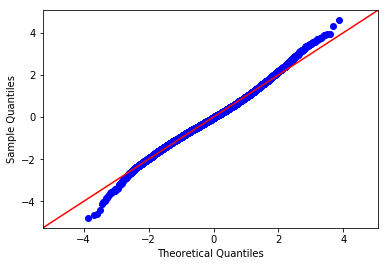

In [1195]:
residuals = happy_family_view_waterfront_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [1196]:
f = 'price_log~sqft_living+bathrooms+lat+grade+view+waterfront+condition'
happy_family_view_waterfront_cond_model = smf.ols(formula=f, data=train_df).fit()

In [1197]:
happy_family_view_waterfront_cond_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     5519.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:58:37   Log-Likelihood:                -2192.2
No. Observations:               17220   AIC:                             4402.
Df Residuals:                   17211   BIC:                             4472.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -64.5623      0.726    -88.965      0.000     -65.985     -63.140
bathrooms[T.Interval(2, 5, closed='right')]    -0.0157      0.006     -2.728      0.006      -0.027      -0.004
grade[T.Interval(7, 8, closed='right')]         0.1622      0.006     28.505      0.000       0.151       0.173
grade[T.Interval(8, 13, closed='right')]        0.4208      0.008     54.238      0.000       0.406       0.436
condition[T.Interval(3, 5, closed='right')]     0.1042      0.005     22.787      0.000       0.095       0.113
sqft_living                                     0.5274      0.008     69.867      0.000       0.513       0.542
lat                                             1.5443      0.015    101.473      0.000       1.514       1.574
view                                            0.0967      0.003     31.319      0.000       0.091       0.103
waterfront                                      0.4047      0.029     14.009      0.000       0.348       0.461
==============================================================================
Omnibus:                      272.518   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.963
Skew:                           0.166   Prob(JB):                     6.40e-92
Kurtosis:                       3.689   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Everything

In [1198]:
outcome = 'price_log'
predictors = train_df.drop(['price', 'price_log'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [1199]:
everything_model = smf.ols(formula=formula, data=train_df).fit()

In [1200]:
everything_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1375.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:58:41   Log-Likelihood:                 5004.8
No. Observations:               17220   AIC:                            -9828.
Df Residuals:                   17129   BIC:                            -9122.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -49.8890      6.205     -8.040      0.000     -62.051     -37.727
bedrooms[T.Interval(3, 7, closed='right')]     -0.0152      0.004     -4.349      0.000      -0.022      -0.008
bathrooms[T.Interval(2, 5, closed='right')]     0.0325      0.004      7.585      0.000       0.024       0.041
condition[T.Interval(3, 5, closed='right')]     0.0653      0.003     19.098      0.000       0.059       0.072
grade[T.Interval(7, 8, closed='right')]         0.0764      0.004     18.856      0.000       0.068       0.084
grade[T.Interval(8, 13, closed='right')]        0.1904      0.006     31.118      0.000       0.178       0.202
sqft_living                                     0.3529      0.013     26.250      0.000       0.327       0.379
sqft_lot                                     6.271e-07   4.94e-08     12.701      0.000     5.3e-07    7.24e-07
floors                                         -0.0490      0.004    -11.856      0.000      -0.057      -0.041
waterfront                                      0.5023      0.019     25.912      0.000       0.464       0.540
view                                            0.0682      0.002     30.853      0.000       0.064       0.073
sqft_above                                      0.0001   6.68e-06     16.185      0.000     9.5e-05       0.000
sqft_basement                                9.197e-06   7.39e-06      1.244      0.214    -5.3e-06    2.37e-05
yr_built                                     5.349e-05   7.76e-05      0.690      0.491   -9.86e-05       0.000
yr_renovated                                 3.782e-05   4.08e-06      9.276      0.000    2.98e-05    4.58e-05
lat                                             0.4334      0.080      5.405      0.000       0.276       0.591
long                                           -0.4194      0.058     -7.284      0.000      -0.532      -0.307
sqft_living15                                7.736e-05   3.73e-06     20.758      0.000    7.01e-05    8.47e-05
sqft_lot15                                   8.446e-08   7.82e-08      1.081      0.280   -6.88e-08    2.38e-07
Summer_2014                                   -12.5060      1.551     -8.062      0.000     -15.546      -9.466
Winter_2014                                   -12.5065      1.551     -8.063      0.000     -15.547      -9.466
Winter_2015                                   -12.4602      1.551     -8.033      0.000     -15.501      -9.420
Summer_2015                                   -12.4163      1.551     -8.004      0.000     -15.457      -9.376
zip_98002                                      -0.0058      0.018     -0.323      0.747      -0.041       0.030
zip_98003                                      -0.0036     

## Removing features with smallest coefficient values

In [1201]:
outcome = 'price_log'
predictors = train_df.drop(['price', 'price_log', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_lot' ], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [1202]:
everything_model_2 = smf.ols(formula=formula, data=train_df).fit()

In [1203]:
everything_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1330.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:58:46   Log-Likelihood:                 4143.3
No. Observations:               17220   AIC:                            -8119.
Df Residuals:                   17136   BIC:                            -7467.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -38.5815      6.488     -5.947      0.000     -51.298     -25.865
bedrooms[T.Interval(3, 7, closed='right')]     -0.0125      0.004     -3.438      0.001      -0.020      -0.005
bathrooms[T.Interval(2, 5, closed='right')]     0.0156      0.004      3.600      0.000       0.007       0.024
condition[T.Interval(3, 5, closed='right')]     0.0538      0.003     15.932      0.000       0.047       0.060
grade[T.Interval(7, 8, closed='right')]         0.0884      0.004     21.313      0.000       0.080       0.096
grade[T.Interval(8, 13, closed='right')]        0.2782      0.006     47.913      0.000       0.267       0.290
sqft_living                                     0.5501      0.006     91.997      0.000       0.538       0.562
floors                                         -0.0165      0.004     -4.566      0.000      -0.024      -0.009
waterfront                                      0.4945      0.020     24.317      0.000       0.455       0.534
view                                            0.0767      0.002     34.141      0.000       0.072       0.081
lat                                             0.4305      0.084      5.111      0.000       0.265       0.596
long                                           -0.2961      0.060     -4.916      0.000      -0.414      -0.178
Summer_2014                                    -9.6811      1.622     -5.969      0.000     -12.860      -6.502
Winter_2014                                    -9.6807      1.622     -5.969      0.000     -12.860      -6.502
Winter_2015                                    -9.6346      1.622     -5.940      0.000     -12.814      -6.456
Summer_2015                                    -9.5850      1.622     -5.909      0.000     -12.764      -6.406
zip_98002                                      -0.0195      0.019     -1.028      0.304      -0.057       0.018
zip_98003                                      -0.0008      0.017     -0.050      0.960      -0.034       0.032
zip_98004                                       1.0314      0.031     33.241      0.000       0.971       1.092
zip_98005                                       0.6629      0.033     19.832      0.000       0.597       0.728
zip_98006                                       0.5918      0.027     21.788      0.000       0.539       0.645
zip_98007                                       0.5667      0.034     16.597      0.000       0.500       0.634
zip_98008                                       0.5590      0.033     17.127      0.000       0.495       0.623
zip_98010                                       0.3441      0.030     11.485      0.000       0.285       0.403
zip_98011                                       0.2748     

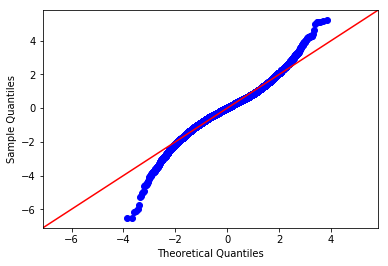

In [1204]:
residuals = everything_model_2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Final Model (or scrubbing for collinearity)

In [1205]:
# Trying to remove some multicollinearity. 
outcome = 'price_log'
predictors_4 = train_df.drop(['price', 'price_log', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'Summer_2014','Summer_2015','Winter_2014', 'Winter_2015', 'grade', 'condition', 'view', 'waterfront', 'long', 'lat'], axis=1)
pred_sum = "+".join(predictors_4.columns)
formula = outcome + "~" + pred_sum

In [1206]:
everything_model_4 = smf.ols(formula=formula, data=train_df).fit()

In [1207]:
everything_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1084.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:58:55   Log-Likelihood:                 1419.0
No. Observations:               17220   AIC:                            -2696.
Df Residuals:                   17149   BIC:                            -2145.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.0144      0.036    193.949      0.000       6.943       7.085
sqft_living     0.7313      0.005    162.091      0.000       0.722       0.740
zip_98002      -0.0337      0.022     -1.548      0.122      -0.076       0.009
zip_98003       0.0348      0.020      1.780      0.075      -0.004       0.073
zip_98004       1.2139      0.019     63.649      0.000       1.177       1.251
zip_98005       0.8223      0.023     34.997      0.000       0.776       0.868
zip_98006       0.7746      0.017     45.119      0.000       0.741       0.808
zip_98007       0.7000      0.024     28.818      0.000       0.652       0.748
zip_98008       0.7103      0.020     36.282      0.000       0.672       0.749
zip_98010       0.2979      0.029     10.238      0.000       0.241       0.355
zip_98011       0.4502      0.022     20.767      0.000       0.408       0.493
zip_98014       0.3698      0.025     14.583      0.000       0.320       0.419
zip_98019       0.3250      0.022     14.719      0.000       0.282       0.368
zip_98022       0.1529      0.021      7.410      0.000       0.112       0.193
zip_98023      -0.0138      0.017     -0.816      0.414      -0.047       0.019
zip_98024       0.5363      0.031     17.354      0.000       0.476       0.597
zip_98027       0.5633      0.018     31.263      0.000       0.528       0.599
zip_98028       0.4230      0.020     21.440      0.000       0.384       0.462
zip_98029       0.6503      0.019     34.285      0.000       0.613       0.688
zip_98030       0.0376      0.020      1.884      0.060      -0.002       0.077
zip_98031       0.0620      0.020      3.130      0.002       0.023       0.101
zip_98032      -0.0222      0.025     -0.873      0.382      -0.072       0.028
zip_98033       0.8424      0.018     47.675      0.000       0.808       0.877
zip_98034       0.5530      0.017     33.064      0.000       0.520       0.586
zip_98038       0.1748      0.016     10.629      0.000       0.143       0.207
zip_98039       1.4774      0.039     38.371      0.000       1.402       1.553
zip_98040       1.0460      0.020     52.531      0.000       1.007       1.085
zip_98042       0.0817      0.017      4.942      0.000       0.049       0.114
zip_98045       0.3870      0.021     18.439      0.000       0.346       0.428
zip_98052       0.6736      0.017     40.744      0.000       0.641       0.706
zip_98053       0.6486      0.018     36.611      0.000       0.614       0.683
zip_98055       0.1426      0.020      7.142      0.000       0.103       0.182
zip_98056       0.3414      0.018     19.120      0.000       0.306       0.376
zip_98058       0.1741      0.017     10.003      0.000       0.140       0.208
zip_98059       0.3574      0.017     20.588      0.000       0.323       0.391
zip_98065       0.4169      0.019     21.92

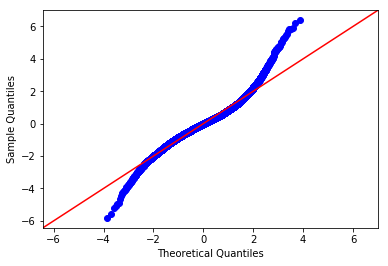

In [1208]:
residuals = everything_model_4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Prediction Modeling

In [1209]:
# Renaming final model for clarity. 
final_model = test_df.drop(['price', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'Summer_2014','Summer_2015','Winter_2014', 'Winter_2015', 'grade', 'condition', 'view', 'waterfront', 'long', 'lat'], axis=1)
final_model.head()

,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,price_log
4469,7.495542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12.850555
18519,7.056175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.102161
14161,7.299797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.965710
16103,6.927558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.577636
758,7.783224,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.660726


In [1210]:
from sklearn.model_selection import train_test_split
y = final_model[["price_log"]]
x = final_model.drop(["price_log"], axis=1)

In [1211]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [1212]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

3444 861 3444 861


In [1213]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [1214]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [1215]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.04878078125369061
Test Mean Squared Error: 0.05409410720458868


In [1216]:
rmse_train = train_mse**.5
rmse_test = test_mse**.5
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

Train RMSE: 0.22086371647169803
Test RMSE: 0.23258139909414227


In [1217]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, x, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, x, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, x, y, cv=20, scoring="neg_mean_squared_error"))

In [1218]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.05192034475288752
-0.05151804892116402
-0.051382639732457616


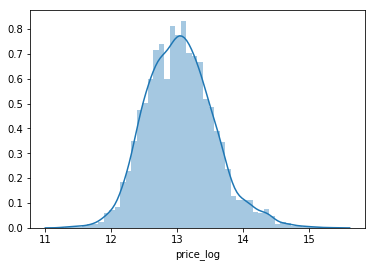

In [1219]:
sns.distplot(final_model['price_log'])

In [1220]:
model = sm.OLS(y, x['sqft_living'])
results = model.fit()

Text(0.5, 1.0, 'Linear Regression')

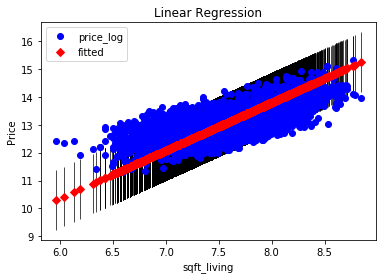

In [1221]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Price")
ax.set_xlabel("sqft_living")
ax.set_title("Linear Regression")

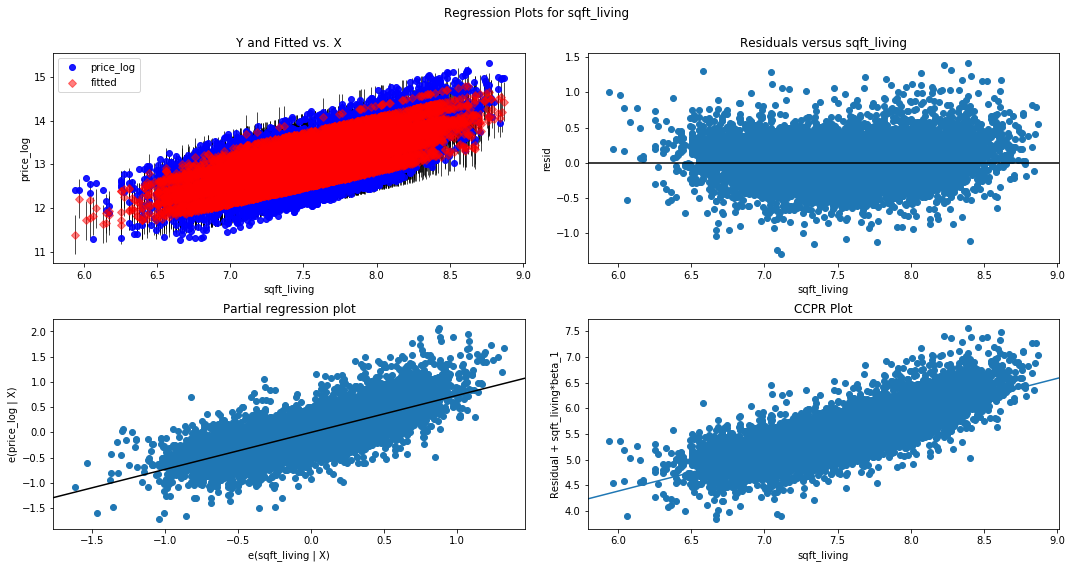

In [1222]:
fig1 = plt.figure(figsize=(15,8))
fig1 = sm.graphics.plot_regress_exog(everything_model_4,"sqft_living", fig=fig1)
plt.show()

In [1223]:
residuals = everything_model_4.resid

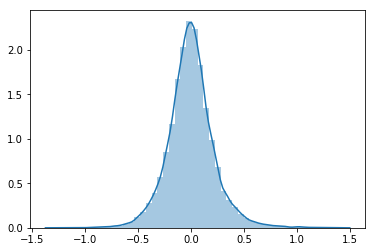

In [1224]:
# Residual plot. 
sns.distplot(residuals)

(11, 15.5)

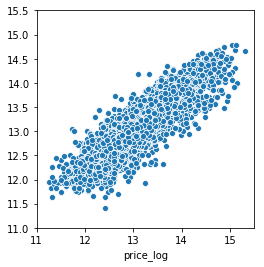

In [1225]:
# Scatterplot of y predicted vs y actual.
sns.scatterplot(train_df[outcome],ypred)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(11, 15.5)
plt.ylim(11, 15.5)